# Gather the data

In [74]:
# importing the necessary libraries

import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from branca.colormap import LinearColormap
#import folium
#import geopandas as gpd

ModuleNotFoundError: No module named 'branca'

In [34]:
# importing the full dataset from airbnb
data_full = pd.read_csv('Data_sets/listings_v1.csv')

In [35]:
# importing a subset of the full dataset from airbnb
# for this anaylsis, we are going to use this dataset

data = pd.read_csv('Data_sets/listings_summary.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134


In [36]:
# checking the shape of the dataframe

data.shape

(20025, 16)

In [37]:
# printing the columns of the dataframe

print(list(data.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [38]:
# checking information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20025 entries, 0 to 20024
Data columns (total 16 columns):
id                                20025 non-null int64
name                              19991 non-null object
host_id                           20025 non-null int64
host_name                         19867 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     20025 non-null object
latitude                          20025 non-null float64
longitude                         20025 non-null float64
room_type                         20025 non-null object
price                             20025 non-null int64
minimum_nights                    20025 non-null int64
number_of_reviews                 20025 non-null int64
last_review                       17621 non-null object
reviews_per_month                 17621 non-null float64
calculated_host_listings_count    20025 non-null int64
availability_365                  20025 non-null int64
dt

# Data Cleaning

In [39]:
# creating a new dataframe with the relevant columns

data2 = data[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price']]

In [40]:
column_accommodates = data_full[['id','accommodates']]

data3 = pd.merge(data2, column_accommodates, on = 'id')

In [41]:
# checking missing values

null_cols = data3.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [42]:
# changing the column name of price to price_USD
data3 = data3.rename(columns = {'price': 'price_USD'})


# adding two new columns: price in euros and price in euros per number of accommodates
Exchange_rate_USD_Eu = 0.895667
data3['price_€'] = data3['price_USD']*Exchange_rate_USD_Eu
data3['price_€_accommodates'] = data3['price_€']/data3['accommodates']

data3

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


In [43]:
# checking the data types of each collumn
data3.dtypes

id                        int64
neighbourhood            object
latitude                float64
longitude               float64
room_type                object
price_USD                 int64
accommodates              int64
price_€                 float64
price_€_accommodates    float64
dtype: object

In [44]:
# checking for low variance columns

low_variance = []

for col in data3._get_numeric_data():
    minimum = min(data3[col])
    ninety_perc = np.percentile(data3[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

[]


In [48]:
# checking the minimum and maximum price

print("Max price is: ", data3['price_€'].max())
print("Min price is: ", data3['price_€'].min())

Max price is:  8061.003
Min price is:  0.0


In [49]:
# removing the values in which price equals to zero
data3 = data3[data3['price_USD'] != 0]
data3

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


In [50]:
# checking for the statistics module values

stats = data3.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,20024.0,1.911695e+07,1.147330e+07,2818.000000,9.631274e+06,1.841851e+07,2.791354e+07,4.065521e+07,1.828226e+07
latitude,20024.0,5.236533e+01,1.644860e-02,52.289270,5.235511e+01,5.236464e+01,5.237526e+01,5.242841e+01,2.015000e-02
longitude,20024.0,4.889477e+00,3.621271e-02,4.753560,4.863620e+00,4.887055e+00,4.909330e+00,5.027690e+00,4.571000e-02
price_USD,20024.0,1.632598e+02,1.985398e+02,5.000000,9.900000e+01,1.300000e+02,1.850000e+02,9.000000e+03,8.600000e+01
accommodates,20024.0,2.868608e+00,1.304534e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.800000e+01,2.000000e+00
price_€,20024.0,1.462264e+02,1.778255e+02,4.478335,8.867103e+01,1.164367e+02,1.656984e+02,8.061003e+03,7.702736e+01
price_€_accommodates,20024.0,5.320559e+01,6.537761e+01,1.119584,3.537885e+01,4.478335e+01,6.157711e+01,4.030501e+03,2.619826e+01


In [51]:
# checking for outliers

outliers = pd.DataFrame(columns=data3.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data3[(data3[col] < lower) | 
                   (data3[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

list_outliers= outliers['Outlier'].tolist()
list(set(outliers))

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


['neighbourhood',
 'longitude',
 'id',
 'price_€_accommodates',
 'room_type',
 'price_USD',
 'Outlier',
 'latitude',
 'accommodates',
 'price_€']

In [52]:
outliers

,Outlier,accommodates,id,latitude,longitude,neighbourhood,price_USD,price_€,price_€_accommodates,room_type
2781,latitude,3,5475024,52.29069,4.98378,Gaasperdam - Driemond,40,35.826680,11.942227,Private room
2789,latitude,4,5503580,52.28927,4.97376,Gaasperdam - Driemond,170,152.263390,38.065847,Entire home/apt
3266,latitude,2,6419068,52.29178,4.96722,Gaasperdam - Driemond,109,97.627703,48.813851,Private room
6401,latitude,4,12756139,52.29221,4.98996,Gaasperdam - Driemond,101,90.462367,22.615592,Entire home/apt
6597,latitude,2,13061174,52.29289,4.97291,Gaasperdam - Driemond,100,89.566700,44.783350,Private room
...,...,...,...,...,...,...,...,...,...,...
19851,price_€_accommodates,4,40461558,52.36776,4.94560,Oostelijk Havengebied - Indische Buurt,818,732.655606,183.163902,Entire home/apt
19852,price_€_accommodates,4,40461636,52.36797,4.94536,Oostelijk Havengebied - Indische Buurt,818,732.655606,183.163902,Entire home/apt
19853,price_€_accommodates,2,40461718,52.36808,4.94680,Oostelijk Havengebied - Indische Buurt,818,732.655606,366.327803,Private room
19977,price_€_accommodates,2,40606689,52.38752,4.83834,Geuzenveld - Slotermeer,500,447.833500,223.916750,Entire home/apt


In [57]:
#Filtering Records on collumn price

filtered_price = outliers[(outliers['Outlier']=='price_€')]
filtered_price

,Outlier,accommodates,id,latitude,longitude,neighbourhood,price_USD,price_€,price_€_accommodates,room_type
31,price_€,4,62801,52.38459,4.85463,Bos en Lommer,750,671.75025,167.937562,Entire home/apt
34,price_€,4,64769,52.36225,4.90200,Centrum-Oost,450,403.05015,100.762537,Entire home/apt
107,price_€,4,258273,52.35420,4.89160,De Pijp - Rivierenbuurt,8000,7165.33600,1791.334000,Entire home/apt
116,price_€,12,283170,52.35353,4.87514,Zuid,650,582.18355,48.515296,Entire home/apt
120,price_€,2,286500,52.37497,4.89884,Centrum-West,9000,8061.00300,4030.501500,Private room
...,...,...,...,...,...,...,...,...,...,...
19903,price_€,6,40522119,52.37552,4.88656,Centrum-West,450,403.05015,67.175025,Entire home/apt
19918,price_€,6,40532805,52.32080,4.85962,Buitenveldert - Zuidas,600,537.40020,89.566700,Entire home/apt
19945,price_€,6,40564848,52.37465,4.89273,Centrum-West,750,671.75025,111.958375,Entire home/apt
19973,price_€,4,40606541,52.38758,4.83844,Geuzenveld - Slotermeer,500,447.83350,111.958375,Entire home/apt


In [65]:
# we are going to drop the collumns with price less than 30€/night and above 900€/night

data4 = data3[(data3['price_€'] >= 30) & (data3['price_€'] <900)]

data_final = data4.reset_index()
data_final

,index,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...,...
19898,20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
19899,20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
19900,20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
19901,20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


In [66]:
# checking for the statistics module values

stats = data_final.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
index,19903.0,9.999228e+03,5.777155e+03,0.000000,4.998500e+03,9.994000e+03,1.499250e+04,2.002400e+04,9.994000e+03
id,19903.0,1.909022e+07,1.146308e+07,2818.000000,9.618686e+06,1.840098e+07,2.785674e+07,4.065521e+07,1.823805e+07
latitude,19903.0,5.236533e+01,1.641390e-02,52.289270,5.235513e+01,5.236463e+01,5.237525e+01,5.242841e+01,2.012000e-02
longitude,19903.0,4.889483e+00,3.610913e-02,4.753560,4.863635e+00,4.887040e+00,4.909335e+00,5.027690e+00,4.570000e-02
price_USD,19903.0,1.577183e+02,1.002305e+02,34.000000,9.900000e+01,1.300000e+02,1.850000e+02,1.000000e+03,8.600000e+01
accommodates,19903.0,2.865498e+00,1.284340e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01,2.000000e+00
price_€,19903.0,1.412631e+02,8.977319e+01,30.452678,8.867103e+01,1.164367e+02,1.656984e+02,8.956670e+02,7.702736e+01
price_€_accommodates,19903.0,5.179993e+01,3.222327e+01,4.478335,3.537885e+01,4.478335e+01,6.157711e+01,8.956670e+02,2.619826e+01


# Data analysis

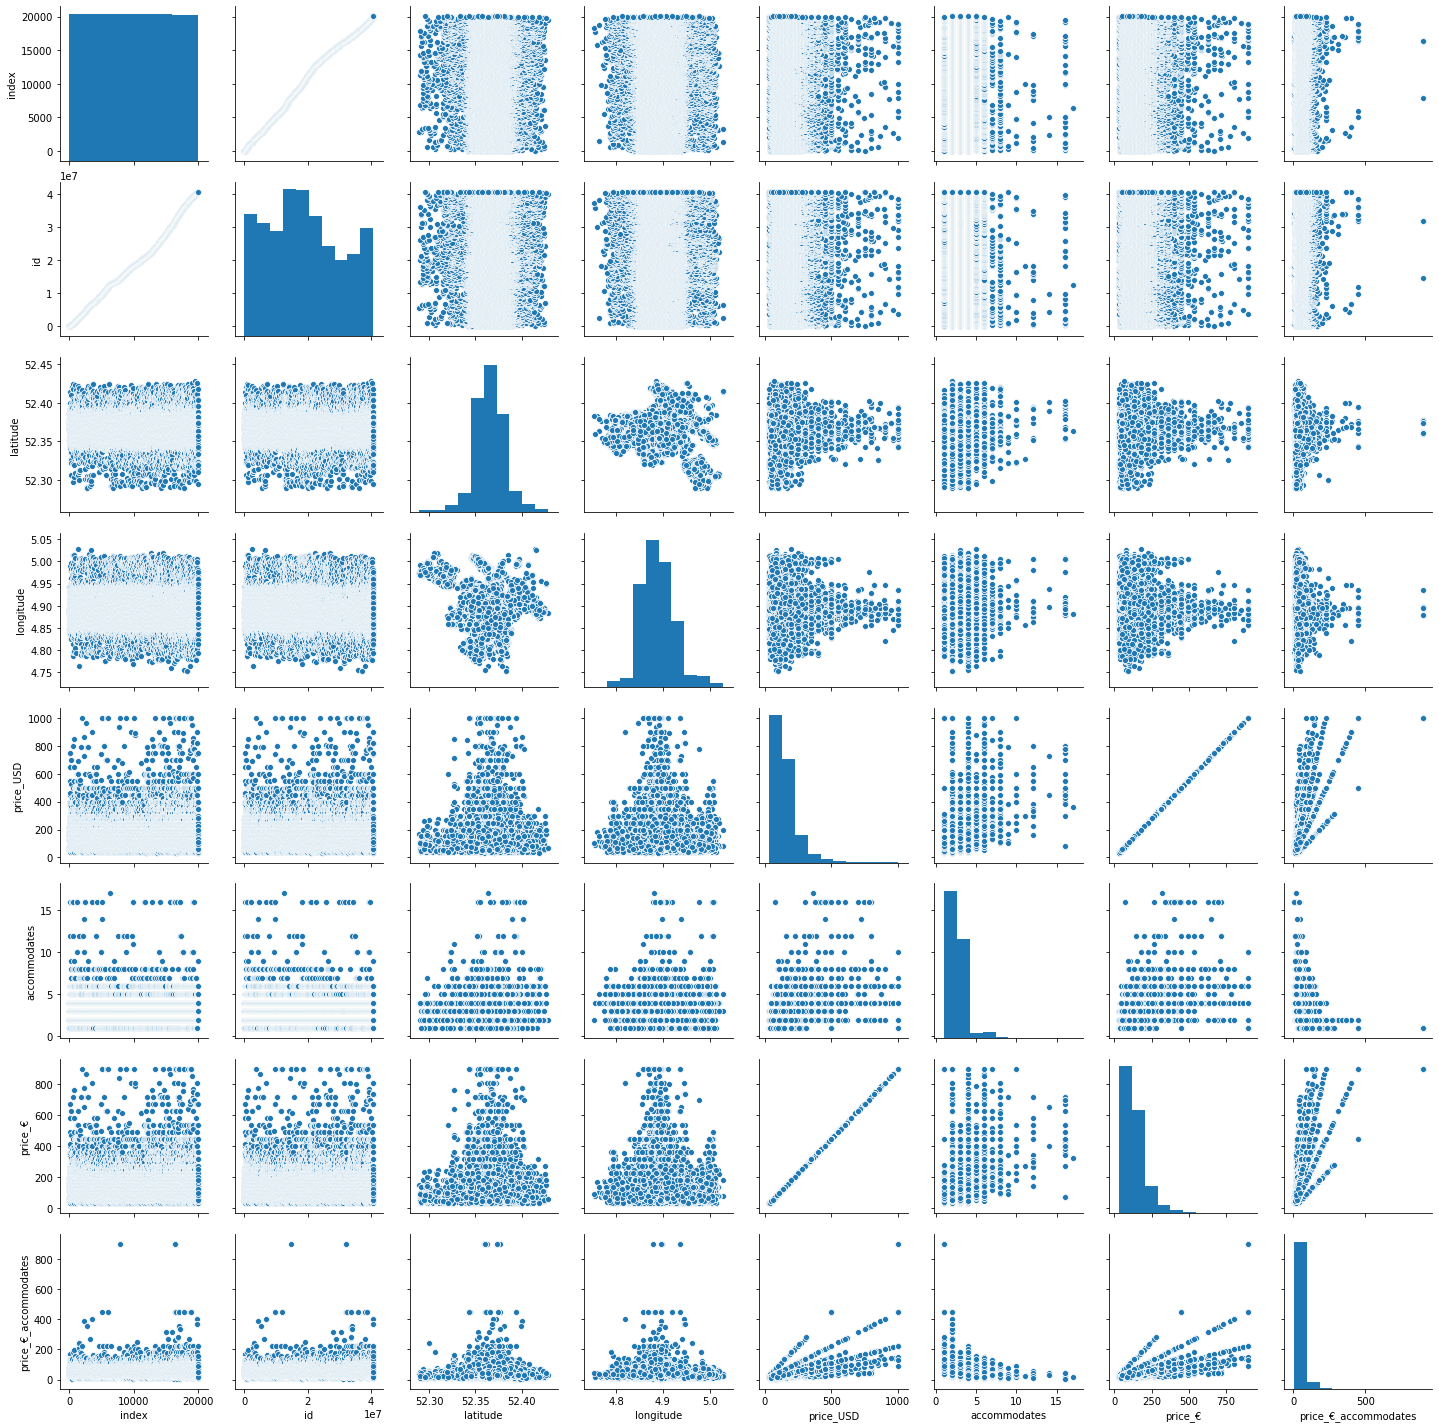

In [67]:
sns.pairplot(data_final)

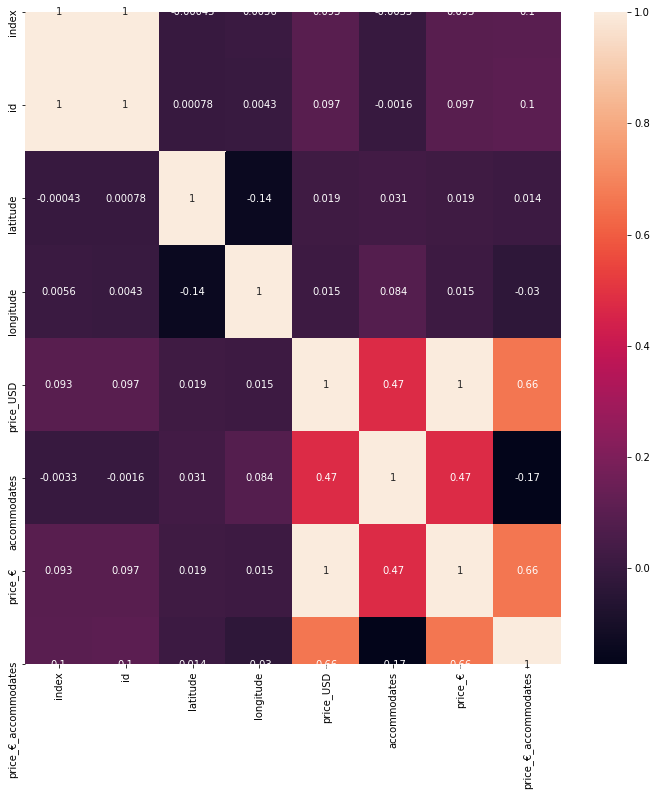

In [68]:
plt.figure(figsize=(12,12))

sns.heatmap(data_final.corr(), annot=True)

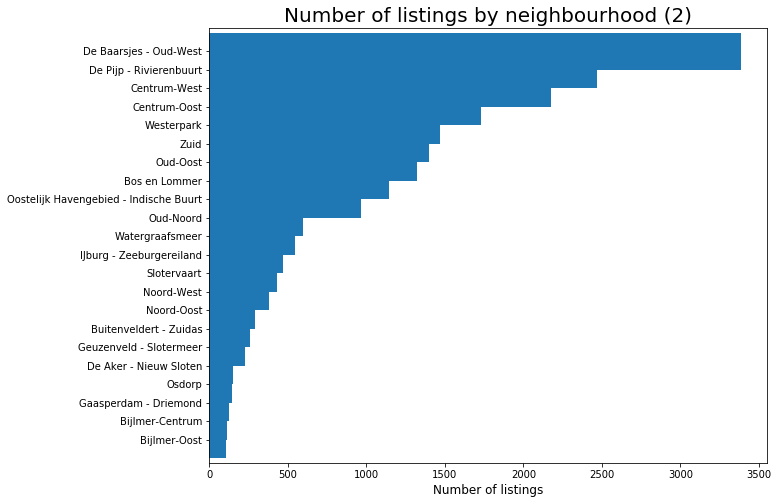

In [70]:
# checking the Number of listings by neighbourhood

feq=data_final['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), width=2)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)

plt.show()

In [71]:
# mapping all the listings

latitude = data_final['latitude'].tolist()
longitude = data_final['longitude'].tolist()
locations = list(zip(latitude, longitude))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

NameError: name 'folium' is not defined

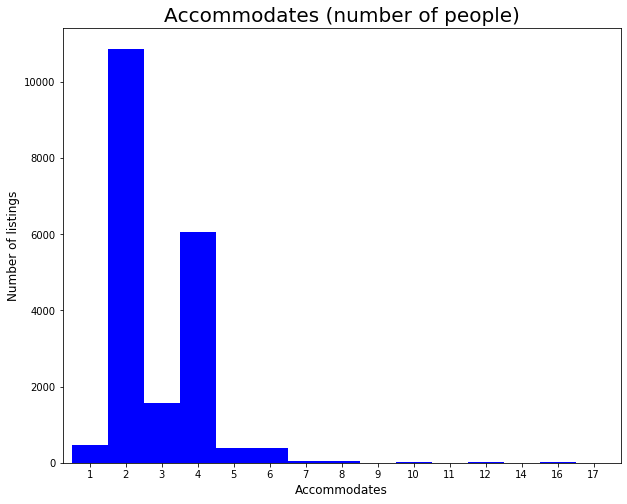

In [75]:
# analysing the distribution number of accommodates

feq=data_final['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

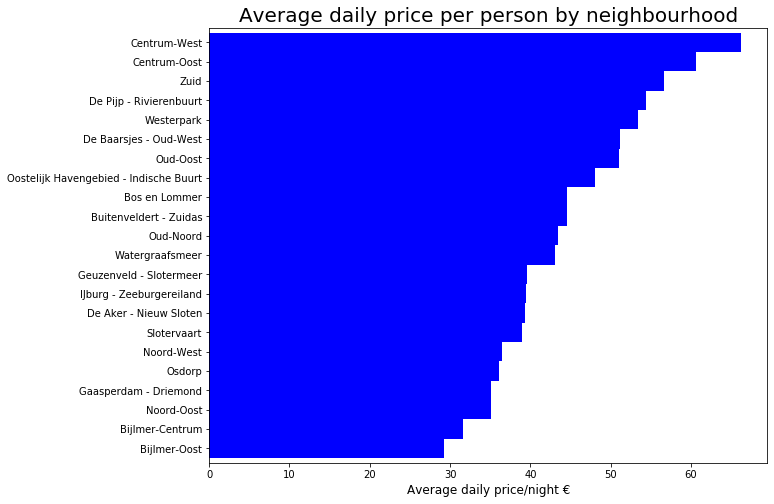

In [92]:
# analysing the distribution of price by neighbourhood

feq = data_final
feq = feq.groupby('neighbourhood')['price_€_accommodates'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price per person by neighbourhood", fontsize=20)
plt.xlabel('Average daily price/night €', fontsize=12)
plt.ylabel("")
plt.show()